# **Proyek Analisis Data: [Bike Sharing]**
- **Nama:** [Rifki Muhammad]
- **Email:** [rifki18995@gmail.com]
- **ID Dicoding:** [rifmudth]

## **Menentukan Pertanyaan Bisnis**
- Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?
- Bagaimana tren penggunaan sepeda dalam setahun?
- Apakah ada pengaruh musim terhadap penyewaan sepeda oleh pelanggan Casual dan Registered?

## **Menyiapkan semua library yang dibutuhkan**

In [118]:
#Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## **Data Wrangling**
### Gathering data

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih 'Bike Sharing Dataset', maka saya mengimpor file 'bike_day.csv' dan 'bike_hour.csv'

#### **Memuat Tabel day_df**

In [119]:
day_df = pd.read_csv(r"C:\Users\USER\Desktop\Submission\Data\bike_day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Memuat Tabel hr_df**

In [120]:
hr_df = pd.read_csv(r"C:\Users\USER\Desktop\Submission\Data\bike_hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **ASSESING DATA**


#### 1. Memeriksa Tabel 'day_df'

In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

#### 2. Cek missing values day_df

In [122]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada hasil di atas dapat kita simpulkan bahwa tabel day_df tidak ada missing values

#### 3. Cek duplikat day_df

In [123]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.

#### 4. Cek keanehan pada tabel

In [124]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita lihat pada tabel di atas, tidak ada keanehan pada nilai statistiknya.

## **Menilai Tabel 'hr_df'**

#### 1. Memeriksa Tabel hr_df

In [125]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

#### 2. Cek missing values

In [126]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita perhatikan tabel hr_df tidak ada missing values.

#### 3. Cek Duplikat 

In [127]:
print("Jumlah duplikasi: ", hr_df.duplicated().sum())

Jumlah duplikasi:  0


#### 4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [128]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

## **CLEANNING DATA**

#### 1. Menghapus tabel yang tidak diperlukan

Sebelum kita masuk ke tahap selanjutnya, kita akan menghapus terlebih dahulu tabel **hr_df**. Alasannya karena tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga tabel hr dan day berbeda hanya di kolom hrnya saja, selebihnya semua sama.

In [129]:
del hr_df

#### 2. Menghapus beberapa kolom yang tidak akan digunakan


Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [130]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


#### 3. Mengubah beberapa detail tentang kolom



kita ubah nama pada kolom agar memudahkan saya, maka kita menggunakan tipe data yang bentuknya kategorikal, jadi beberapa yang sebelumnya adalah angka akan saya rubah. Serta jika  ada tipe data yang juga tidak sesuai,kita rubah juga.

In [131]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [132]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_df['holiday'] = day_df['holiday'].map({
    0: 'Hari Kerja', 1: 'Hari Libur'
})
day_df['workingday'] = day_df['workingday'].map({
    0: 'Hari Libur', 1: 'Hari Kerja'
})
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})



In [133]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

In [134]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,Jan,Hari Kerja,Sat,Hari Libur,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,Hari Kerja,Sun,Hari Libur,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,Hari Kerja,Mon,Hari Kerja,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,Hari Kerja,Tue,Hari Kerja,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,Hari Kerja,Wed,Hari Kerja,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [135]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

#### 1. Kelompok penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [136]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\2974312987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

#### 2. Kelompok penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [137]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\2311190310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, menyewa sepeda pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju, hujan dan buruk.

#### 3. Kelompok penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [138]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\1497150874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
             max   min         mean      sum
holiday                                     
Hari Kerja  8714    22  4527.104225  3214244
Hari Libur  7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih sering menyewa sepeda pada hari biasa/kerja

#### 4. Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)

In [139]:
day_df.groupby(by='weekday').agg({
        'count':['max','min','mean']
    })

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\132579528.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, rata-rata jumlah penyewa dari terbesar adalah Jumat(Fri)

#### 5. Kelompok penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [140]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\3484920239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
Hari Kerja  8362   22  4584.820000
Hari Libur  8714  605  4330.168831

Berdasarkan hasil diatas, jumlah penyewaan sepeda terbesar yaitu workingday

#### 6. Kelompok penyewa sepeda (baik casual dan registered) berdasarkan season

In [141]:
day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\3939925999.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisa diatas, berdasarkan rata-rata penyewa sepeda baik Casual Dan Registered, sering menyewa pada musim gugur (Fall)

#### 7. Kelompok temp, hum, dan humidity berdasarkan season

In [142]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\3725487608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Berdasarkan hasil analisis diatas, terlihat:
- Rata-rata temperatur dan atemp tertinggi pada musim gugur (fall)
- Rata-rata humidity tertinggi pada musim dingin (winter)

#### 8. Hubungan antara penyewa casual, registered, dan count

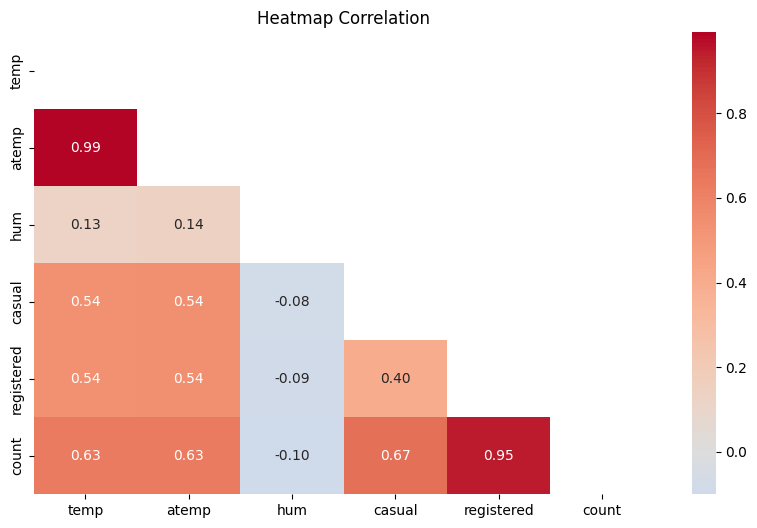

In [143]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sn.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Heatmap Correlation")
plt.show()

Berdasarkan hasil analisa diatas, didapat pernyataan sebagai berikut:
- atemp dan temp sangat berkorelasi (0.99).
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan negatif dengan hum (-0.10).

## **Visualization & Explanatory Analysis**

#### **Pertanyaan 1: Apakah ada peran cuaca terhadap jumlah pengguna sepeda?**

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\2557184439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


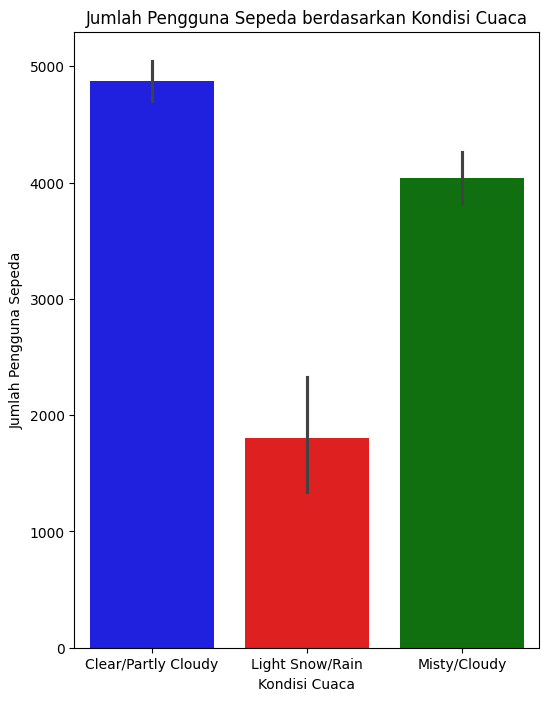

In [153]:
plt.figure(figsize=(6,8))
sn.barplot(
    x='weather_cond',
    y='count',
    palette=['blue', 'red', 'green'],
    data=day_df)
    

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan hasil visualisasi data menggunakan boxplot, dapat disimpulkan bahwa terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati.

#### **Pertanyaan 2: Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?**

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\4170863002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_18928\4170863002.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


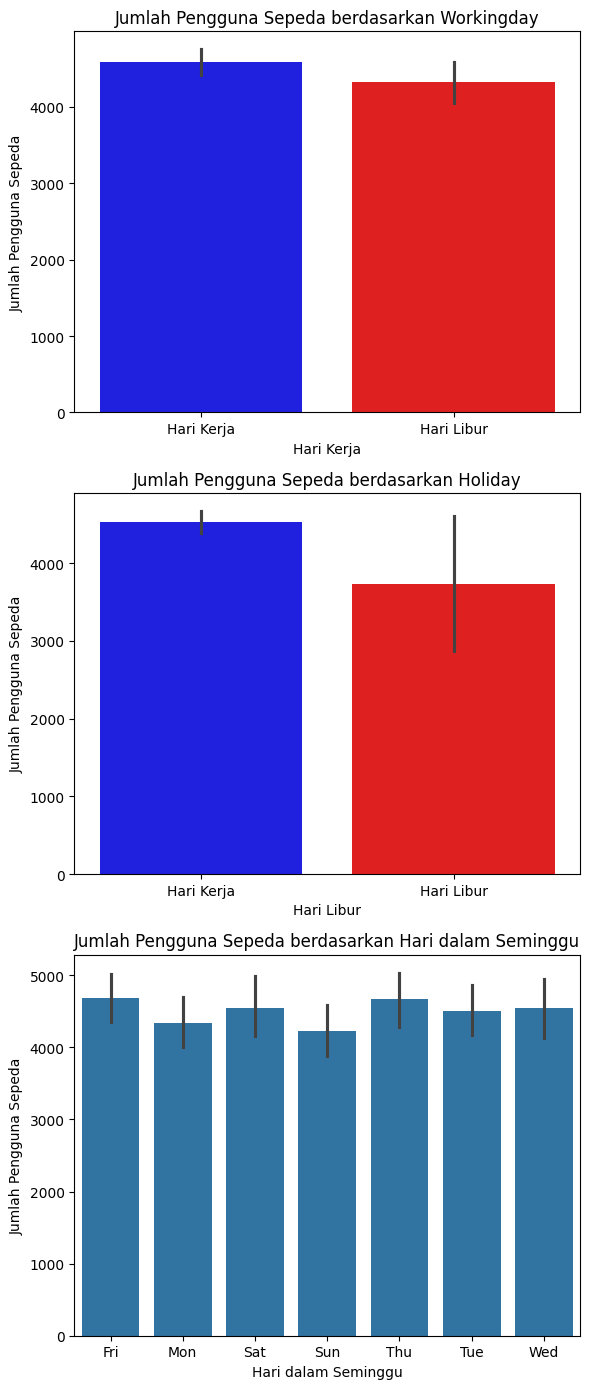

In [148]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6,14))

# Berdasarkan workingday
sn.barplot(
    x='workingday',
    y='count',
    palette=['blue', 'red'],
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Workingday')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sn.barplot(
  x='holiday',
  y='count',
  palette=['blue', 'red'],
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Holiday')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sn.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])

axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas menggunakan barplot, maka diketahui:
- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) dan hari biasa daripada akhir pekan atau hari libur,
- Jumlah penyewa sepeda pada hari Jumat paling banyak menyewa sepeda, dan hari Minggu menempati posisi terendah.

#### **Pertanyaan 2: Bagaimana tren penggunaan sepeda dalam setahun?**

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\4232160843.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


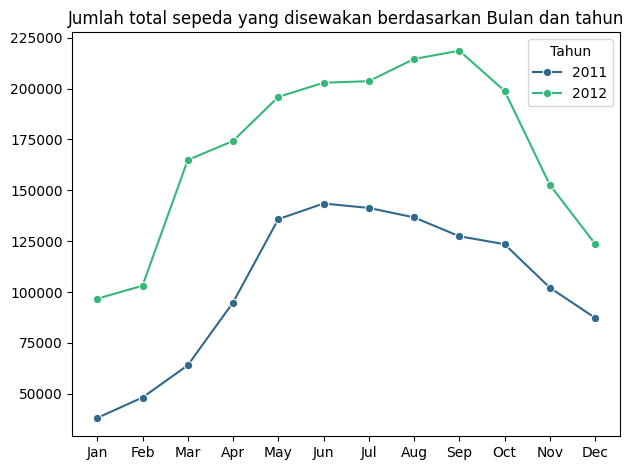

In [146]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sn.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue='year',
    palette="viridis",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) jelas menang unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

#### **Pertanyaan 3: Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?**

C:\Users\USER\AppData\Local\Temp\ipykernel_18928\3867087674.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


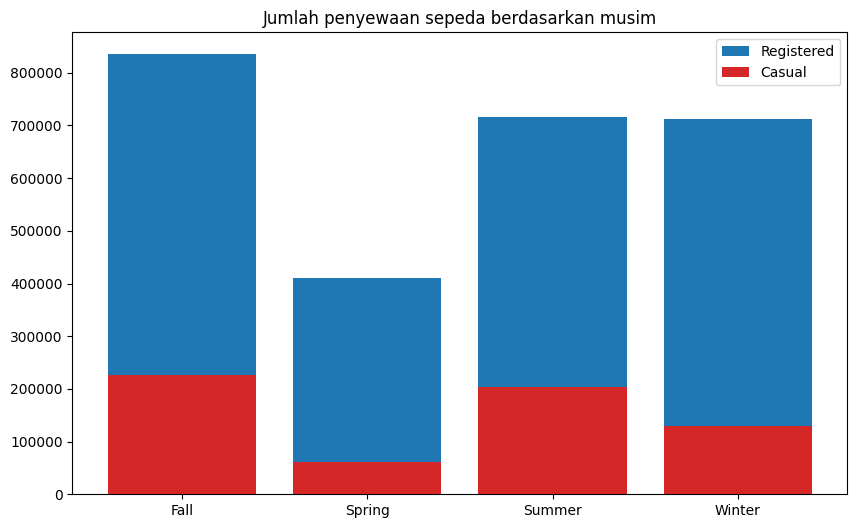

In [147]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:red'
)


plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan hasil analisa diatas dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall).

## **Conclusion**



- pertanyaan 1: Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?
Kondisi yang tampak pada visualisasi ini terbagi menjadi tiga bagian. Jumlah penyewa sepeda berdasarkan workingday, dibandingkan non working day. Para penyewa sepeda pada hari biasa lebih banyak dibandingkan hari libur biasanya berhubungan aktifitas kebanyakan orang pada hari-hari biasa dan pada hari libur para penyewa lebih sering dirumah maupun jalan kaki atau menggunkan transportasi umum dan terlihat pada hari jumat. Peningkatan jumlah penyewa sepeda pada hari Jumat menunjukkan adanya peluang bisnis yang menarik. Dengan memahami perilaku konsumen dan menerapkan strategi yang tepat, perusahaan penyewaan sepeda dapat memaksimalkan potensi pendapatan dan memperkuat posisi mereka di pasar.

- pertanyaan 2: Bagaimana tren penggunaan sepeda dalam setahun? 
Terdapat peningkatan yang signifikan dalam jumlah total sepeda yang disewakan pada tahun 2012 dibandingkan dengan tahun 2011. Hal ini menunjukkan pertumbuhan bisnis yang positif dan peningkatan minat masyarakat terhadap layanan penyewaan sepeda. Pola penggunaan sepeda mengalami fluktuasi yang signifikan dari bulan ke bulan, dengan puncak dan dasar yang berbeda di setiap tahunnya. Ini mengindikasikan adanya faktor musiman atau peristiwa khusus yang mempengaruhi perilaku penyewaan.

-  pertanyaan 3: Apakah ada pengaruh musim terhadap penyewaan sepeda oleh pelanggan Casual dan Registered?
Musim gugur menjadi musim puncak penyewaan sepeda dengan jumlah yang sangat signifikan. Hal ini mengindikasikan bahwa kondisi cuaca yang sejuk dan pemandangan alam yang indah pada musim gugur sangat menarik minat masyarakat untuk bersepeda. Musim gugur merupakan peluang besar untuk meningkatkan pendapatan. Perusahaan dapat memanfaatkan momentum ini dengan menawarkan promo khusus, event bersepeda, atau kerjasama dengan pihak lain.